Authored by: Magda Odrowaz, Riley Nguyen, Matt Smuda, Drew Nanda

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression

In [ ]:
import pandas as pd
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import random
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('draft_data.csv')
df.head()

,PIDM,Years.to.Degree.Average,CT.First.Semester.GPA.Average,TM.Cum.GPA.Average,CT.BEST,Degree.Attained.Indicator,CT.Class,CT.Super.Class,CT.Residency,CT.Student.Type,CT.Housing.Status,CT.Age,CT.Gender,CT.Domestic.Minority,CT.State,CT.Zip.Code,CT.IPEDS.Race.Ethnicity,CT.ACE,CT.Honors.Student,CT.First.Generation.Student,CT.Federal.Inclusion,Greek_Involvement,Term.Count.Greek,First.Major,Last.Major,Major.Changes,ACC221,ACC222,BLS342,CSE148,ECO201,ECO202,FIN301,AW...Degrees.Count,AW...Major.Count,Distance
0,1202427,4,3.58,3.71,32,1,Freshman,"1st Year, 2nd Term",Resident,New,ON-CAMPUS,18,Male,Domestic Non-Minority,Ohio,45056,White,N,N,N,Y,2,6,Music,Business Economics,3,A,A,A,CR,A,A,A,1,1,0.00
1,1383580,2,3.71,3.12,29,1,Freshman,"4th Year, 1st Term",Non-Resident,Transfer,ON-CAMPUS,21,Male,Domestic Non-Minority,California,94506,White,N,N,N,Y,0,0,International Studies,Finance,2,B,B,CR,B,CR,CR,C,1,1,2002.00
2,1427113,4,2.68,3.06,26,1,Freshman,"1st Year, 2nd Term",Resident,New,ON-CAMPUS,18,Female,Domestic Non-Minority,Ohio,45036,White,N,N,Y,Y,0,0,Accountancy,Marketing,3,C,C,A,B,B,B,W,1,2,26.72
3,1427288,4,3.04,3.05,25,1,Freshman,"1st Year, 2nd Term",Resident,New,ON-CAMPUS,18,Female,Domestic Non-Minority,Ohio,45311,White,N,N,N,Y,0,0,University Studies,Accountancy,4,B,C,B,C,B,D,W,1,1,8.72
4,1427314,0,1.07,1.78,28,0,Freshman,"1st Year, 2nd Term",Resident,New,COMMUTER,18,Male,Domestic Non-Minority,Ohio,45013,White,N,N,Y,Y,0,0,Information Systems,Information Systems,1,F,W,No CR,C,No CR,No CR,No CR,0,0,8.73


In [ ]:
df['First.Major'].unique()

array(['Music', 'International Studies', 'Accountancy',
       'University Studies', 'Information Systems',
       'Undeclared - Business', 'Finance', 'Marketing',
       'Undeclared - Applied Science', 'Business Economics', 'Economics',
       'Mathematics', 'Biology', 'Individualized Studies',
       'Management and Leadership', 'Kinesiology',
       'Supply Chain & Operations Mgmt', 'Political Science',
       'Interior Design', 'Strategic Communication',
       'Quantitative Economics', 'Zoology', 'Premedical Studies',
       'Computer Science', 'Psychology', 'Statistics', 'Spanish',
       'Theatre', 'Media and Culture', 'Family Studies',
       'Sport Leadership & Management', 'Journalism',
       'Mechanical Engineering', 'East Asian Languages & Culture',
       'Geography', 'Graphic Design', 'Interactive Media Studies',
       'Nutrition', 'General Engineering', 'Special Education',
       'Mathematics & Statistics', 'Interdisciplinary Bus Managemt',
       'Philosophy', 'Integ

## Data Exploration

**First, we obtain a summary report for the data using pandas_profiling to look for major problems in the data such as:**


*   missing values
*   uniform values

*   high correlations between variables
*   lots of missing values



In [ ]:
# pip install pandas-profiling

In [ ]:
pd.set_option('display.max_colwidth', None) ## to display all columns

# next we import ProfileReport
from pandas_profiling import ProfileReport

In [ ]:
#profile = ProfileReport(df, title="Pandas Profiling Report")
#profile.to_notebook_iframe()

**We also plot the distribution for numeric data**




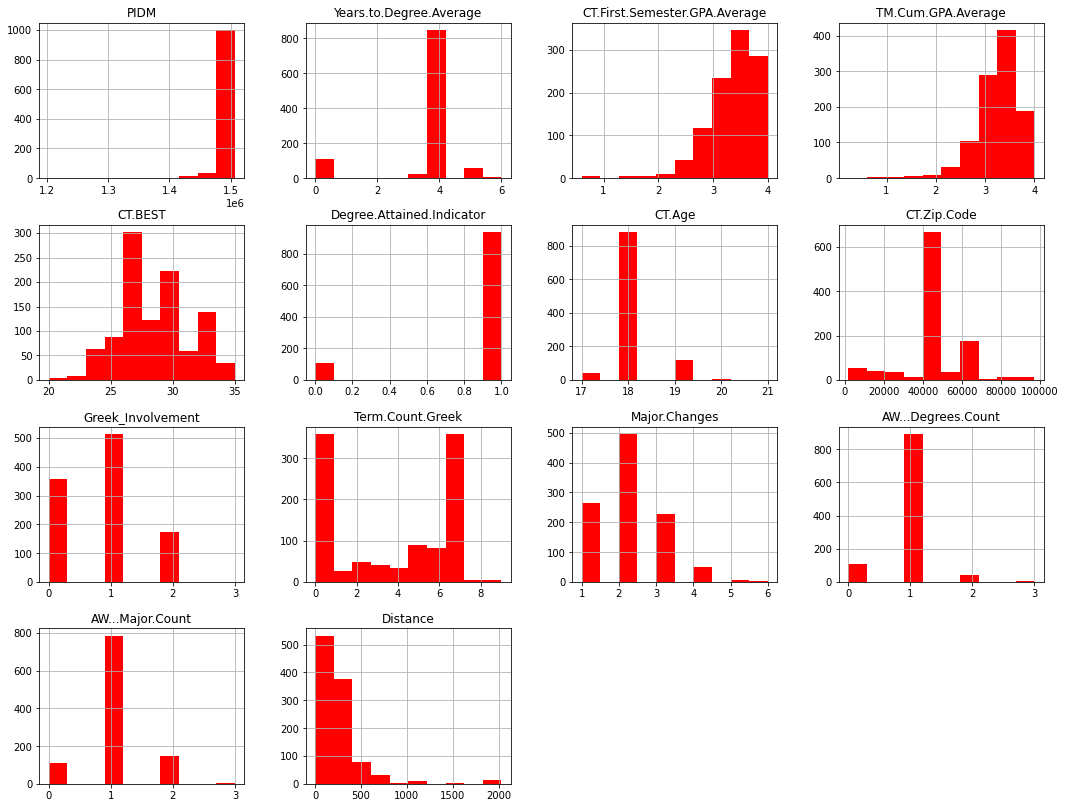

In [ ]:
df.hist(bins = 10, figsize = (18, 14), color = 'red')
plt.show()

## Data Preprocessing Steps

### Dropping columns that are not helpful for our models

PIDM is dropped because it is a unique key. This column provides information about student identification and will hurt the model performance.

In [ ]:
df = df.drop('PIDM', axis =1) 

We would also drop CT.Super.Class. 

In [ ]:
df = df.drop('CT.Super.Class', axis =1)

Greek Involvement is dropped because it has a high correlation with Greek terms. We are more interested in the quantity of Greek life exposure rather than the classification of greek life involvement.

In [ ]:
df = df.drop('Greek_Involvement', axis = 1)

We are dropping the years to degree average because it is highly correlated to the degree attained variable. Our definition of success also focuses on graduation of a student, not how long they took to graduate.  

In [ ]:
df = df.drop('Years.to.Degree.Average', axis = 1)

Major count and degree attained indicator are highly correlated and contain most of the same information. The major count is dropped and degree attained indicator is kept, since we would only focus on identifying the students that graduated and did not, not necessarily on how many majors they had.

In [ ]:
df = df.drop('AW...Major.Count', axis=1)

CT.Class is a uniform value of Freshman that provides no useful information to the model.

In [ ]:
df = df.drop('CT.Class', axis = 1)

CT.ACE is another uniform value that does not provide any useful information.

In [ ]:
df = df.drop('CT.ACE', axis = 1)

Federal Inclusion is a uniform value that does not provide information.

In [ ]:
df = df.drop('CT.Federal.Inclusion', axis = 1)

Gender, race/ethnicity, and age will be dropped because they are variables that would be valuable in descriptive statistics, although they are factors that our client will not be able to make meaningful recomendations with.

In [ ]:
df = df.drop(['CT.IPEDS.Race.Ethnicity', 'CT.Gender', 'CT.Age'], axis = 1)

State and zipcode variables will be dropped because the numeric variable of distance would proivde the most meaning to our model. We would prefer to have information about how far away students are from home rather than grouping them on the basis of region/distance.

In [ ]:
df = df.drop(['CT.Zip.Code', 'CT.State'], axis = 1 )

Domestic minority will be dropped because we have a very small sample size for students that are non-domestic minorities. 

In [ ]:
df = df.drop('CT.Domestic.Minority', axis = 1)

Student type and housing status will be dropped because the data is highly skewed and does not provide information that would improve our model. First generation students also lacks a sample size that could provide meaningful insights to our recomendations.

In [ ]:
df = df.drop(['CT.Student.Type', 'CT.Housing.Status', 'CT.First.Generation.Student'], axis = 1)

Last Major is dropped, because this would not be information we have access to when we run the model (predicting students' graduation)

In [ ]:
df.drop('Last.Major', axis = 1, inplace = True)

**We will drop columns that may give away whether the students graduated or not, as they may affect the model performance**

In [ ]:
df = df.drop('TM.Cum.GPA.Average', axis = 1)

In [ ]:
df = df.drop('AW...Degrees.Count', axis = 1)

**A correlation plot of all numeric variables is plotted on a matrix to ensure that no variables are highly correlated with one another.**

In [ ]:
df.corr()

,CT.First.Semester.GPA.Average,CT.BEST,Degree.Attained.Indicator,Term.Count.Greek,Major.Changes,Distance
CT.First.Semester.GPA.Average,1.000000,0.074313,0.302195,0.164247,0.214962,-0.017695
CT.BEST,0.074313,1.000000,-0.044167,-0.160690,-0.055004,-0.058789
Degree.Attained.Indicator,0.302195,-0.044167,1.000000,0.288836,0.217577,-0.011120
Term.Count.Greek,0.164247,-0.160690,0.288836,1.000000,0.087760,0.062339
Major.Changes,0.214962,-0.055004,0.217577,0.087760,1.000000,-0.059115
Distance,-0.017695,-0.058789,-0.011120,0.062339,-0.059115,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CT.First.Semester.GPA.Average  1047 non-null   float64
 1   CT.BEST                        1047 non-null   int64  
 2   Degree.Attained.Indicator      1047 non-null   int64  
 3   CT.Residency                   1047 non-null   object 
 4   CT.Honors.Student              1047 non-null   object 
 5   Term.Count.Greek               1047 non-null   int64  
 6   First.Major                    1047 non-null   object 
 7   Major.Changes                  1047 non-null   int64  
 8   ACC221                         1047 non-null   object 
 9   ACC222                         1047 non-null   object 
 10  BLS342                         1047 non-null   object 
 11  CSE148                         1047 non-null   object 
 12  ECO201                         1047 non-null   o

### Dummy Encoding

**Basic information about object variables is collected to help guide dummy-encoding.**

In [ ]:
df.select_dtypes(include = "O").nunique()

CT.Residency          2
CT.Honors.Student     2
First.Major          59
ACC221                8
ACC222                8
BLS342                8
CSE148                8
ECO201                9
ECO202                9
FIN301                8
dtype: int64

In [ ]:
df.isna().sum()

CT.First.Semester.GPA.Average    0
CT.BEST                          0
Degree.Attained.Indicator        0
CT.Residency                     0
CT.Honors.Student                0
Term.Count.Greek                 0
First.Major                      0
Major.Changes                    0
ACC221                           0
ACC222                           0
BLS342                           0
CSE148                           0
ECO201                           0
ECO202                           0
FIN301                           0
Distance                         0
dtype: int64

**The variables First.Major and courses are dummy-encoded and a Random Forest Classifier is used to predict feature importances of these three variables. The top levels of each variable that obtain the most information for the model will be kept in the dataset used for modeling. Original variables will be dropped. We decided to agree on a 0.05 benchmark level for all feature importances that we wanted to keep in the model.**

*First.Major*

In [ ]:
df_to_collapse2 = df[['First.Major', 'Degree.Attained.Indicator']]

In [ ]:
df_to_collapse2 = pd.get_dummies(df_to_collapse2, drop_first = True)
df_to_collapse2.head()

,Degree.Attained.Indicator,First.Major_Athletic Training,First.Major_Biochemistry,First.Major_Biology,First.Major_Business Economics,First.Major_Chemical Engineering,First.Major_Chemistry,First.Major_Communication Pre-Major,First.Major_Comparative Media Studies,First.Major_Computer Engineering,First.Major_Computer Science,First.Major_Diplomacy and Global Politics,First.Major_East Asian Languages & Culture,First.Major_Economics,First.Major_Engineering Management,First.Major_Environmental Earth Science,First.Major_Family Studies,First.Major_Finance,First.Major_General Engineering,First.Major_Geography,First.Major_German,First.Major_Graphic Design,First.Major_Individualized Studies,First.Major_Information Systems,First.Major_Integrated Mathematics Edu,First.Major_Interactive Media Studies,First.Major_Interdisciplinary Bus Managemt,First.Major_Interior Design,First.Major_International Studies,First.Major_Journalism,First.Major_Kinesiology,First.Major_Major Undeclared,First.Major_Management and Leadership,First.Major_Marketing,First.Major_Mathematics,First.Major_Mathematics & Statistics,First.Major_Mechanical Engineering,First.Major_Media and Culture,First.Major_Music,First.Major_Music Education,First.Major_Music Performance,First.Major_Nutrition,First.Major_Philosophy,First.Major_Political Science,First.Major_Premedical Studies,First.Major_Psychology,First.Major_Quantitative Economics,First.Major_Software Engineering,First.Major_Spanish,First.Major_Special Education,First.Major_Sport Leadership & Management,First.Major_Statistics,First.Major_Strategic Communication,First.Major_Supply Chain & Operations Mgmt,First.Major_Theatre,First.Major_Undeclared - Applied Science,First.Major_Undeclared - Business,First.Major_University Studies,First.Major_Zoology
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
rf2 = RandomForestClassifier(random_state = 50)
rf2.fit(df_to_collapse2.drop('Degree.Attained.Indicator', axis=1), df_to_collapse2['Degree.Attained.Indicator'])

RandomForestClassifier(random_state=50)

In [ ]:
feature_importances2 = pd.DataFrame({'Variable' :df_to_collapse2.drop('Degree.Attained.Indicator', axis = 1).columns, 'Importance': rf2.feature_importances_})
feature_importances2.set_index('Variable', inplace = True)
feature_importances2 = feature_importances2.sort_values(by = 'Importance', ascending = False)
feature_importances2

,Importance
Variable,
First.Major_Business Economics,0.205364
First.Major_Undeclared - Business,0.095150
First.Major_University Studies,0.092881
First.Major_Music Performance,0.088437
First.Major_Chemistry,0.075508
First.Major_Mathematics & Statistics,0.070682
First.Major_Management and Leadership,0.057693
First.Major_Information Systems,0.056130
First.Major_Marketing,0.026151


In [ ]:
df['Business_Economics'] = (df["First.Major"] == "Business Economics").astype('int')
df['Undeclared_Bus'] = (df["First.Major"] == "Undeclared-Business").astype('int')
df['Undeclared'] = (df["First.Major"] == "University Studies").astype('int')
df['MusicPerformance'] = (df["First.Major"] == "Music Performance").astype('int')
df['Chemistry'] = (df["First.Major"] == "Chemistry").astype('int')
df['Mth_Stats'] = (df["First.Major"] == "Mathematics & Statistics").astype('int')
df['Mgt_Ldr'] = (df["First.Major"] == "Management and Leadership").astype('int')
df['Information_Systems'] = (df["First.Major"] == "Information Systems").astype('int')

In [ ]:
df.drop('First.Major', axis = 1, inplace = True)

**The course variables will be collapsed and compared all together to decipher which courses are most important and least important in terms of the probabaility to influence graduation versus no graduation.**

In [ ]:
df_to_collapse4 = df[['ACC221', 'ACC222', 'BLS342', 'CSE148', 'ECO201', 'ECO202', 'FIN301', 'Degree.Attained.Indicator']]

In [ ]:
df_to_collapse4 = pd.get_dummies(df_to_collapse4, drop_first = True)
df_to_collapse4.head()

,Degree.Attained.Indicator,ACC221_B,ACC221_C,ACC221_CR,ACC221_D,ACC221_F,ACC221_No CR,ACC221_W,ACC222_B,ACC222_C,ACC222_CR,ACC222_D,ACC222_F,ACC222_No CR,ACC222_W,BLS342_B,BLS342_C,BLS342_CR,BLS342_D,BLS342_F,BLS342_No CR,BLS342_W,CSE148_B,CSE148_C,CSE148_CR,CSE148_D,CSE148_F,CSE148_No CR,CSE148_W,ECO201_Audit,ECO201_B,ECO201_C,ECO201_CR,ECO201_D,ECO201_F,ECO201_No CR,ECO201_W,ECO202_Audit,ECO202_B,ECO202_C,ECO202_CR,ECO202_D,ECO202_F,ECO202_No CR,ECO202_W,FIN301_B,FIN301_C,FIN301_CR,FIN301_D,FIN301_F,FIN301_No CR,FIN301_W
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [ ]:
df_to_collapse4 = df_to_collapse4.drop(['ACC221_CR', 'ACC221_No CR', 'ACC222_CR', 'ACC222_No CR', 'BLS342_CR', 'BLS342_No CR', 'CSE148_CR', 'CSE148_No CR', 'ECO201_CR', 'ECO201_No CR', 'ECO201_Audit', 'ECO202_CR', 'ECO202_No CR', 'ECO202_Audit', 'FIN301_CR', 'FIN301_No CR'], axis=1)

In [ ]:
rf4 = RandomForestClassifier(random_state = 50)
rf4.fit(df_to_collapse4.drop('Degree.Attained.Indicator', axis=1), df_to_collapse4['Degree.Attained.Indicator'])

RandomForestClassifier(random_state=50)

In [ ]:
feature_importances4 = pd.DataFrame({'Variable' :df_to_collapse4.drop('Degree.Attained.Indicator', axis = 1).columns, 'Importance': rf4.feature_importances_})
feature_importances4.set_index('Variable', inplace = True)
feature_importances4 = feature_importances4.sort_values(by = 'Importance', ascending = False)
feature_importances4

,Importance
Variable,
BLS342_B,0.094055
ACC222_B,0.061906
FIN301_B,0.060961
CSE148_F,0.052421
CSE148_B,0.052291
ECO202_B,0.045584
ECO201_B,0.045481
CSE148_C,0.042937
BLS342_C,0.042824


In [ ]:
df['BLS342_B'] = (df["BLS342"] == "BLS342_B").astype('int')
df['ACC222_B'] = (df["ACC222"] == "ACC222_B").astype('int')
df['FIN301_B'] = (df["FIN301"] == "FIN301_B").astype('int')
df['CSE148_F'] = (df["CSE148"] == "CSE148_F").astype('int')

In [ ]:
df.drop(['BLS342', 'ECO201', 'ECO202', 'FIN301', 'CSE148', 'ACC221', 'ACC222'], axis = 1, inplace = True) #drop the initial columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CT.First.Semester.GPA.Average  1047 non-null   float64
 1   CT.BEST                        1047 non-null   int64  
 2   Degree.Attained.Indicator      1047 non-null   int64  
 3   CT.Residency                   1047 non-null   object 
 4   CT.Honors.Student              1047 non-null   object 
 5   Term.Count.Greek               1047 non-null   int64  
 6   Major.Changes                  1047 non-null   int64  
 7   Distance                       1047 non-null   float64
 8   Business_Economics             1047 non-null   int64  
 9   Undeclared_Bus                 1047 non-null   int64  
 10  Undeclared                     1047 non-null   int64  
 11  MusicPerformance               1047 non-null   int64  
 12  Chemistry                      1047 non-null   i

**Dummy encoding is performed for all other categorical variables.**

In [ ]:
df2 = pd.get_dummies(df[['CT.Residency', 'CT.Honors.Student']], drop_first = True)

In [ ]:
df['CT.Residency']

0           Resident
1       Non-Resident
2           Resident
3           Resident
4           Resident
            ...     
1042    Non-Resident
1043        Resident
1044        Resident
1045    Non-Resident
1046    Non-Resident
Name: CT.Residency, Length: 1047, dtype: object

In [ ]:
final_df = pd.concat([df.select_dtypes(exclude = 'O'), df2], axis = 1)

In [ ]:
final_df

,CT.First.Semester.GPA.Average,CT.BEST,Degree.Attained.Indicator,Term.Count.Greek,Major.Changes,Distance,Business_Economics,Undeclared_Bus,Undeclared,MusicPerformance,Chemistry,Mth_Stats,Mgt_Ldr,Information_Systems,BLS342_B,ACC222_B,FIN301_B,CSE148_F,CT.Residency_Resident,CT.Honors.Student_Y
0,3.58,32,1,6,3,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,3.71,29,1,0,2,2002.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.68,26,1,0,3,26.72,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,3.04,25,1,0,4,8.72,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,1.07,28,0,0,1,8.73,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,3.60,35,1,7,2,747.01,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1043,2.82,31,0,3,3,29.13,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1044,3.55,24,1,4,3,22.87,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1045,2.92,20,1,5,1,606.44,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CT.First.Semester.GPA.Average  1047 non-null   float64
 1   CT.BEST                        1047 non-null   int64  
 2   Degree.Attained.Indicator      1047 non-null   int64  
 3   Term.Count.Greek               1047 non-null   int64  
 4   Major.Changes                  1047 non-null   int64  
 5   Distance                       1047 non-null   float64
 6   Business_Economics             1047 non-null   int64  
 7   Undeclared_Bus                 1047 non-null   int64  
 8   Undeclared                     1047 non-null   int64  
 9   MusicPerformance               1047 non-null   int64  
 10  Chemistry                      1047 non-null   int64  
 11  Mth_Stats                      1047 non-null   int64  
 12  Mgt_Ldr                        1047 non-null   i

## Splitting the data

**Split the Data (70% training, 30% test)**

In [ ]:
X = final_df.drop('Degree.Attained.Indicator', axis=1)

In [ ]:
y = final_df['Degree.Attained.Indicator']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

**Upsampling on the training data**

We will use upsampling to avoid an unbalanced data that can affect out modeling process.

In [ ]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE

In [ ]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)


## First Model

**Model will be created using a Support Vector Classifier (SVC)**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

**Fit the train and test sets**

In [ ]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

In [ ]:
support_vector_classifier = SVC(kernel='linear')
support_vector_classifier.fit(X_train,y_train)
y_pred_svc = support_vector_classifier.predict(X_test)

**Find the model's accuracy and cross-validation accuracy**

In [ ]:
from sklearn.metrics import confusion_matrix
cm_support_vector_classifier = confusion_matrix(y_test,y_pred_svc)
print(cm_support_vector_classifier,end='\n\n')

[[ 31   5]
 [105 174]]



In [ ]:
print(classification_report(y_test, y_pred_svc)) 

              precision    recall  f1-score   support

           0       0.23      0.86      0.36        36
           1       0.97      0.62      0.76       279

    accuracy                           0.65       315
   macro avg       0.60      0.74      0.56       315
weighted avg       0.89      0.65      0.71       315



In [ ]:
numerator = cm_support_vector_classifier[0][0] + cm_support_vector_classifier[1][1]
denominator = sum(cm_support_vector_classifier[0]) + sum(cm_support_vector_classifier[1])
acc_svc = (numerator/denominator) * 100
print("Accuracy : ",round(acc_svc,2),"%")

Accuracy :  65.08 %


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_svc = cross_val_score(estimator = SVC(kernel = 'linear'), X = X_train, y = y_train, cv = 10, n_jobs = -1)
print("Cross Validation Accuracy : ",round(cross_val_svc.mean() * 100 , 2),"%")

Cross Validation Accuracy :  82.76 %


**We will perform some parameters tuning to find the best set of parameters**

In [ ]:
from sklearn.model_selection import GridSearchCV
#set the parameters
parameters = {'C': [1,4,8,16,32] ,'kernel':['linear', 'rbf']}
svc = SVC()
svc_grid = GridSearchCV(svc,parameters, cv=5)

svc_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 4, 8, 16, 32], 'kernel': ['linear', 'rbf']})

In [ ]:
svc_grid.best_params_

{'C': 16, 'kernel': 'rbf'}

In [ ]:
y_pred_svc_grid = svc_grid.predict(X_test)


In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_svc_grid))

              precision    recall  f1-score   support

           0       0.23      0.58      0.33        36
           1       0.93      0.74      0.83       279

    accuracy                           0.72       315
   macro avg       0.58      0.66      0.58       315
weighted avg       0.85      0.72      0.77       315



In [ ]:
cm_support_vector_classifier = confusion_matrix(y_test,y_pred_svc_grid)
print(cm_support_vector_classifier,end='\n\n')

[[ 21  15]
 [ 72 207]]



In [ ]:
numerator = cm_support_vector_classifier[0][0] + cm_support_vector_classifier[1][1]
denominator = sum(cm_support_vector_classifier[0]) + sum(cm_support_vector_classifier[1])
acc_svc = (numerator/denominator) * 100
print("Accuracy : ",round(acc_svc,2),"%")

Accuracy :  72.38 %


In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_svc = cross_val_score(estimator = svc_grid, X = X_train, y = y_train, cv = 10, n_jobs = -1)
print("Cross Validation Accuracy : ",round(cross_val_svc.mean() * 100 , 2),"%")

Cross Validation Accuracy :  86.41 %


## Second Model using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)
y_pred_log = reg_log.predict(X_test)

In [ ]:
cm_log = confusion_matrix(y_test, y_pred_log)
cm_log

array([[ 30,   6],
       [102, 177]])

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.23      0.83      0.36        36
           1       0.97      0.63      0.77       279

    accuracy                           0.66       315
   macro avg       0.60      0.73      0.56       315
weighted avg       0.88      0.66      0.72       315



In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(reg_log, X_train, y_train, cv=5))

[0.73863636 0.83269962 0.85171103 0.85931559 0.8365019 ]


In [ ]:
import numpy as np
print(np.mean(cross_val_score(reg_log, X_train, y_train, cv=5)))

0.8237729001036985


In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
reglog_cv=GridSearchCV(reg_log,grid,cv=10)
reglog_cv.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ",reglog_cv.best_params_)
print("accuracy :",reglog_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.8306037473976406


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

In [ ]:
y_pred_log_cv = reglog_cv.predict(X_test)

**The result is not improved or different from our original model**


In [ ]:
cm_log_2 = confusion_matrix(y_test, y_pred_log_cv)
cm_log_2

array([[ 31,   5],
       [102, 177]])

## Third Model using RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
reg_rf = RandomForestClassifier()
reg_rf.fit(X_train, y_train)
y_pred_reg_rf = reg_rf.predict(X_test)

In [ ]:
cm_reg_rf = confusion_matrix(y_test,y_pred_reg_rf)
print(cm_reg_rf,end='\n\n')

[[ 20  16]
 [ 51 228]]



In [ ]:
print(metrics.classification_report(y_test, y_pred_reg_rf))

              precision    recall  f1-score   support

           0       0.28      0.56      0.37        36
           1       0.93      0.82      0.87       279

    accuracy                           0.79       315
   macro avg       0.61      0.69      0.62       315
weighted avg       0.86      0.79      0.81       315



In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(reg_rf, X_train, y_train, cv=5))
print(np.mean(cross_val_score(reg_rf, X_train, y_train, cv=5)))

[0.84848485 0.88593156 0.90494297 0.92015209 0.8973384 ]
0.892888005530591


In [ ]:
from sklearn.model_selection import RandomizedSearchCV


In [ ]:
def get_rf_parameters():
    n_estimators = [10, 50, 100]
    max_features = ['auto', 'sqrt', 'log2']
    max_depth = [5, 10, 20, 50, None]
    min_samples_split = [2, 4, 6, 8]
    min_samples_leaf = [1, 2, 4, 6]
    bootstrap = [True, False]

    random_grid = {'n_estimators':n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap':bootstrap}
    model = RandomForestClassifier(random_state =42)
    rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 5, cv = 3, verbose =  2, random_state = 42)
    rf_random.fit(X_train, y_train)
    parameters = rf_random.best_params_
    print("Best Parameters: ", parameters)
    return parameters

In [ ]:
get_rf_parameters()

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=8, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=5, max_features=log2, min_samples_leaf=6, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END bootstrap=False, max_depth=50, max_features=log2, min_samples_leaf=6, min_samples_split=8, n_estimators=50; total t

{'n_estimators': 50,
 'min_samples_split': 8,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 20,
 'bootstrap': False}

In [ ]:
reg_rf_2 = RandomForestClassifier(n_estimators= 50,
 min_samples_split= 8,
 min_samples_leaf=2,
 max_features='log2',
 max_depth= 20,
 bootstrap= False)
reg_rf_2.fit(X_train, y_train)
y_pred_reg_rf_2 = reg_rf_2.predict(X_test)

In [ ]:
cm_reg_rf_2 = confusion_matrix(y_test, y_pred_reg_rf_2)
cm_reg_rf_2

array([[ 19,  17],
       [ 47, 232]])

In [ ]:
print(metrics.classification_report(y_test, y_pred_reg_rf_2))

              precision    recall  f1-score   support

           0       0.29      0.53      0.37        36
           1       0.93      0.83      0.88       279

    accuracy                           0.80       315
   macro avg       0.61      0.68      0.63       315
weighted avg       0.86      0.80      0.82       315



In [ ]:
print(cross_val_score(reg_rf_2, X_train, y_train, cv=5))
print(np.mean(cross_val_score(reg_rf_2, X_train, y_train, cv=5)))

[0.81439394 0.85171103 0.90874525 0.91254753 0.89353612]
0.8845402696163152


## Fourth Model using NaiveBayes


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred = gnb.predict(X_test)

In [ ]:
cm_gnb = confusion_matrix(y_test, gnb_pred)
cm_gnb

array([[  0,  36],
       [  0, 279]])

In [ ]:
print(metrics.classification_report(y_test, gnb_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.89      1.00      0.94       279

    accuracy                           0.89       315
   macro avg       0.44      0.50      0.47       315
weighted avg       0.78      0.89      0.83       315



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Fifth Model using XGBoost


In [ ]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost as xgb

In [ ]:
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

In [ ]:
xgb_cl.fit(X_train, y_train)
y_pred_xgb = xgb_cl.predict(X_test)


In [ ]:
cm_xgb = confusion_matrix(y_test,y_pred_xgb)
print(cm_reg_rf,end='\n\n')

[[ 20  16]
 [ 51 228]]



In [ ]:
print(metrics.classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.25      0.72      0.38        36
           1       0.95      0.73      0.83       279

    accuracy                           0.73       315
   macro avg       0.60      0.72      0.60       315
weighted avg       0.87      0.73      0.77       315



**Parameters tuning**

In [ ]:
param_grid = {
    "max_depth": [3, 4, 5, 7, 8, 10],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [ ]:
# Init classifier
xgb_cl = xgb.XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="accuracy")

In [ ]:
xgb_cl_2 = grid_cv.fit(X_train, y_train)

In [ ]:
xgb_cl_2.best_score_,xgb_cl_2.best_params_

(0.8852744059939742,
 {'colsample_bytree': 0.5,
  'gamma': 0,
  'learning_rate': 0.01,
  'max_depth': 10,
  'reg_lambda': 0,
  'scale_pos_weight': 1,
  'subsample': 0.8})

In [ ]:
# fit the new model using the returned parameters
xgb_cl = xgb.XGBClassifier(
    grid_cv.best_params_,
    objective="binary:logistic"
)


In [ ]:
y_pred_xgb_2 = xgb_cl_2.predict(X_test)

In [ ]:
cm_xgb_2 = confusion_matrix(y_test,y_pred_xgb_2)
print(cm_xgb,end='\n\n')

[[ 26  10]
 [ 76 203]]



In [ ]:
print(metrics.classification_report(y_test, y_pred_xgb_2))

              precision    recall  f1-score   support

           0       0.30      0.64      0.41        36
           1       0.95      0.81      0.87       279

    accuracy                           0.79       315
   macro avg       0.62      0.72      0.64       315
weighted avg       0.87      0.79      0.82       315



In [ ]:
print(cross_val_score(xgb_cl, X_train, y_train, cv=5))
print(np.mean(cross_val_score(xgb_cl, X_train, y_train, cv=5)))

[nan nan nan nan nan]
nan


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/usr/local/lib/python3.7/dist-packages/xgboost/training.py", line 74,

In [ ]:
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / (TP + FN))
    # calculate the specificity
    conf_specificity = (TN /(TN + FP))
    
    # calculate precision
    conf_precision = (TN /(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {conf_accuracy}') 
    print(f'Mis-Classification: {conf_misclassification}') 
    print(f'Sensitivity: {conf_sensitivity}') 
    print(f'Specificity: {conf_specificity}') 
    print(f'Precision: {conf_precision}')
    print(f'f_1 Score: {conf_f1}')

In [ ]:
confusion_metrics(cm_xgb)

True Positives: 203
True Negatives: 26
False Positives: 10
False Negatives: 76
--------------------------------------------------
Accuracy: 0.726984126984127
Mis-Classification: 0.27301587301587305
Sensitivity: 0.7275985663082437
Specificity: 0.7222222222222222
Precision: 0.7222222222222222
f_1 Score: 0.7249004257656916


In [ ]:
confusion_metrics(cm_xgb_2)

True Positives: 226
True Negatives: 23
False Positives: 13
False Negatives: 53
--------------------------------------------------
Accuracy: 0.7904761904761904
Mis-Classification: 0.20952380952380956
Sensitivity: 0.8100358422939068
Specificity: 0.6388888888888888
Precision: 0.6388888888888888
f_1 Score: 0.7143544286401429


In [ ]:
confusion_metrics(cm_log)

True Positives: 177
True Negatives: 30
False Positives: 6
False Negatives: 102
--------------------------------------------------
Accuracy: 0.6571428571428571
Mis-Classification: 0.34285714285714286
Sensitivity: 0.6344086021505376
Specificity: 0.8333333333333334
Precision: 0.8333333333333334
f_1 Score: 0.7203907203907205


In [ ]:
confusion_metrics(cm_reg_rf)

True Positives: 228
True Negatives: 20
False Positives: 16
False Negatives: 51
--------------------------------------------------
Accuracy: 0.7873015873015873
Mis-Classification: 0.21269841269841272
Sensitivity: 0.8172043010752689
Specificity: 0.5555555555555556
Precision: 0.5555555555555556
f_1 Score: 0.6614447345517842


In [ ]:
confusion_metrics(cm_reg_rf_2)

True Positives: 232
True Negatives: 19
False Positives: 17
False Negatives: 47
--------------------------------------------------
Accuracy: 0.7968253968253968
Mis-Classification: 0.20317460317460323
Sensitivity: 0.8315412186379928
Specificity: 0.5277777777777778
Precision: 0.5277777777777778
f_1 Score: 0.6457188896213286


In [ ]:
confusion_metrics(cm_support_vector_classifier)

True Positives: 207
True Negatives: 21
False Positives: 15
False Negatives: 72
--------------------------------------------------
Accuracy: 0.7238095238095238
Mis-Classification: 0.2761904761904762
Sensitivity: 0.7419354838709677
Specificity: 0.5833333333333334
Precision: 0.5833333333333334
f_1 Score: 0.6531440162271805


**To balance our model efficiency in identifying the at-risk students while still having low mis-classification rate (to ensure our faculty/advisor team has the capacity to acommodate these targeted students), we would choose the Logistic Regression model. The specificity is over .83, while we have a relatively high accuracy and low mis-classification rate**

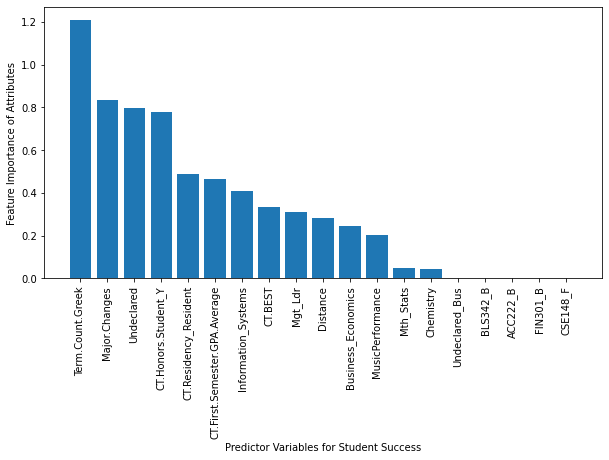

In [ ]:
feature_importance=pd.DataFrame({'feature':list(X.columns),'feature_importance':[abs(i) for i in reg_log.coef_[0]]})
feature_importance=feature_importance.sort_values('feature_importance',ascending=False)
plt.figure(figsize=(10, 5))
plt.bar(feature_importance["feature"],feature_importance["feature_importance"])
plt.xticks(rotation = 90)
plt.xlabel('Predictor Variables for Student Success')
plt.ylabel('Feature Importance of Attributes')
plt.show() 

In [ ]:
odds = np.exp(reg_log.coef_[0])
pd.DataFrame(odds, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
Term.Count.Greek,3.356913
Major.Changes,2.303743
Undeclared,2.221406
CT.Honors.Student_Y,2.181829
CT.Residency_Resident,1.633093
CT.First.Semester.GPA.Average,1.589087
Information_Systems,1.506603
CT.BEST,1.395258
Mgt_Ldr,1.361840
Distance,1.325430
